# Teste Cognitivo.AI

Olá ! Obrigada pelo interesse em fazer parte da rede de experts da Cognitivo.ai! Esse é um
teste com o objetivo de conhecer um pouco mais sobre a sua forma de trabalhar com
problemas que envolvem engenharia de dados.

## O problema

O presente problema se refere aos dados de vinhos portugueses "Vinho Verde", que possuem
variantes de vinho branco e tinto. Devido a questões de privacidade, apenas variáveis
físico-químicas (input) e sensoriais (output) estão disponíveis (por exemplo, não há dados
sobre tipo de uva, marca do vinho, preço de venda, etc).

## Objetivo

Criar um modelo para estimar a qualidade do vinho.

## Informação sobre os atributos

Variáveis input (baseado em testes físico-químicos):
1. Tipo
2. Acidez fixa
3. Volatilidade da acidez
4. Ácido cítrico
5. Açúcar residual
6. Cloretos
7. Dióxido de enxofre livre
8. Dióxido de enxofre total
9. Densidade
10. pH
11. Sulfatos
12. Álcool

Variável output (baseado em dado sensorial):
13. Qualidade (score entre 0 and 10)

## Resolução

1. Faça uma análise exploratória para avaliar a consistência dos dados e identificar
possíveis variáveis que impactam na qualidade do vinho.


2. Para a realização deste teste você pode utilizar o software de sua preferência (Python
ou R), só pedimos que compartilhe conosco o código fonte (utilizando um repositório
git). Além disso, inclua um arquivo README.md onde você deve cobrir as respostas
para os 5 pontos abaixo:

> a. Como foi a definição da sua estratégia de modelagem?

> b. Como foi definida a função de custo utilizada?

> c. Qual foi o critério utilizado na seleção do modelo final?

> d. Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar
este método?

> e. Quais evidências você possui de que seu modelo é suficientemente bom?

## Descrição dos dados

https://drive.google.com/open?id=1-oG5-kBt9xQ3Li4PEexpiA9_7RZhRM1f

------------------
------------------
------------------

# Metodologia aplicada

Como foi postulado na resolução esperada do teste, devemos fazer uma EDA dos dados presentes no arquivo `winequality.csv`, que descrevem diversas características físico-químicas de vinhos verdes. Em seguida de acordo com o objetivo e as questões propostas na segunda parte da resolução, devemos criar um modelo para estimar a qualidade do vinho, mais especificamente, a variável de output.

Para completar estas etapas, será realizado, na seguinte ordem:

1. [Importação dos dados](#part1)
1. [Separação de masssa de dados em treino e teste](#part2)
1. [Limpeza e manipulação dos dados para consumo](#part3)
1. [Análise exploratória](#part4)
1. [Modelagem preditiva](#part5)
1. [Validação dos modelos com massa de teste](#part6)

Ao final dessas etapas, teremos a capacidade de corresponder as missões deste teste.

<a id="part1"></a>
# Importação dos dados

Nessa etapa iremos consumir o arquivo disponibilizado para a realização do teste, `winequality.csv`. Mas, antes disso, iremos carregar os recursos utilizados no decorrer deste notebook.

### Carregando bibliotecas e configurações utilizadas

In [52]:
# análise de dados e manipulação
import dcor
import math
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

from IPython.display import display, HTML
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))
pd.set_option("display.max_rows", 10)

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(12,12)})

# algoritmos de aprendizado de máquina
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.kernel_ridge import KernelRidge

# ignorar avisos
import warnings
warnings.filterwarnings('ignore')

### Carregando dados

In [2]:
wine_raw_data = pd.read_csv('./input/winequality.csv', delimiter=';')
wine_raw_data.sample(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3254,White,7.1,0.380,0.40,2.2,0.042,54.0,201.0,0.99177,3.03,0.50,11.4,5
3693,White,6.8,0.310,0.30,8.0,0.028,33.0,122.0,0.99164,3.13,0.63,12.6,7
1625,White,6.4,0.260,0.49,6.4,0.037,37.0,161.0,0.99540,3.38,0.53,9.7,6
4354,White,6.4,0.310,0.27,7.4,0.049,48.0,169.0,0.99323,3.27,0.45,11.1,6
5853,Red,8.5,0.210,0.52,1.9,0.090,9.0,23.0,0.99648,3.36,0.67,10.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,Red,7.7,0.665,0.00,2.4,0.090,8.0,19.0,0.99740,3.27,0.73,9.3,5
1743,White,8.3,0.300,0.36,10.0,0.042,33.0,169.0,0.99820,3.23,0.51,9.3,6
2224,White,8.0,0.450,0.28,10.8,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7
4102,White,6.9,0.370,0.23,9.5,0.057,54.0,166.0,0.99568,3.23,0.42,10,5


In [3]:
wine_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


Podemos perceber que não temos dados ausentes em nenhuma das colunas de variáveis. Também podemos identificar que a variável `type` é categórica, e possui os seguintes valores:

In [4]:
", ".join(wine_raw_data.type.unique())

'White, Red'

Quase todas as outras variáveis aparentam ter valores continuos, com exceção da variável output `quality` que assume valores inteiros. A variável `alcohol` que em primeira instância foi declarada como do tipo `object`, apesar de também aparentar ser também do tipo `float64`. Vamos tentar identificar se existe algum linha em que o valor não pode ser convertido para `float`.

In [5]:
alcohol_not_float_indexes = []

for index, alcohol_value in enumerate(wine_raw_data.alcohol):
    try:
        float(alcohol_value)
    except ValueError:
        alcohol_not_float_indexes.append(index)
        
alcohol_not_float_rows = wine_raw_data.iloc[alcohol_not_float_indexes,:]
alcohol_not_float_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4315,White,6.7,0.410,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,128.933.333.333.333,7
4319,White,6.7,0.410,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,128.933.333.333.333,7
4323,White,8.4,0.270,0.30,2.2,0.037,36.0,129.0,0.99085,2.89,0.30,114.666.666.666.667,6
4341,White,7.4,0.270,0.52,15.7,0.054,36.0,139.0,0.99788,3.04,0.62,100.333.333.333.333,6
4353,White,7.4,0.160,0.30,1.4,0.064,34.0,166.0,0.99136,3.11,0.42,114.333.333.333.333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,Red,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333,6
6337,Red,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,110.666.666.666.667,6
6339,Red,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,956.666.666.666.667,6
6373,Red,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,135.666.666.666.667,7


Podemos notar que os valores da variável `alcohol`, a partir do quarto dígito, apresentam números de dízimas periódicas. Muito provavelmente, não precisamos eliminar essas entradas, e devemos somente converte-las para valores condizentes com os outros valores. Já que vamos precisar analisar os outros valores diminuir erros de indução, iremos realizar esta operação na etapa de [Limpeza e manipulação dos dados para consumo](#part3), depois da separação das massas de dados.

<a id="part2"></a>
# Separação de masssa de dados em treino e teste

Para podermos validar nossos modelos ao final da modelagem, iremos destinar uma parte dos dados para a validação.

Vale notar que, antes de fazer qualquer inferência sobre os dados, devemos separa-los em duas massas de dados distintas, uma especificamente para análise e modelagem, e a outra para validação do modelo. Nosso objetivo com essa abordagem, mesmo antes de começar qualquer análise exploratória, é evitar o viés que podemos introduzir no nosso modelo ao utilizar dados de validação, visto que mesmo a exploração dos dados irá influenciar a modelagem dos dados.

In [6]:
wine_raw_data_train, wine_raw_data_test = train_test_split(wine_raw_data, test_size=0.2, random_state=32)
wine_raw_data_train.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4276,White,5.2,0.31,0.20,2.40,0.027,27.0,117.0,0.98886,3.56,0.45,13,7
4668,White,6.0,0.17,0.33,6.00,0.036,30.0,111.0,0.99362,3.32,0.58,10.15,7
4648,White,6.7,0.61,0.21,1.65,0.117,40.0,240.0,0.99380,3.11,0.57,9.3,5
1891,White,7.6,0.33,0.41,13.70,0.045,44.0,197.0,0.99890,3.18,0.64,9.1,5
2413,White,7.1,0.21,0.28,2.70,0.034,23.0,111.0,0.99405,3.35,0.64,10.2,4


A partir de agora, não iremos utilizar o objeto `wine_raw_data_test`, até que seja necessário realizar a validação dos nossos modelos.

<a id="part3"></a>
# Limpeza e manipulação dos dados para consumo

Nesta etapa iremos limpar e manipular os dados para obter uma massa de dados mais apropriada para a exploração e modelagem. Através dos passos anteriores podemos já destacar os seguintes pontos de atenção:

1. A variável `type` é do tipo categórica, assumindo dois valores 'White' e 'Red'.
1. A variável `alcohol` está encodada como do tipo `object` apesar de conter valores que podem ser equiparáveis ao tipo `float`.

Vamos primeiramente entender os valores contidos na variável `alcohol`:

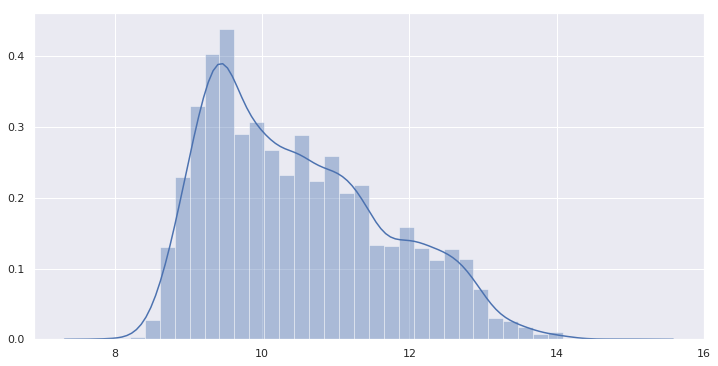

In [7]:
def get_alcohol_not_float_dataset_indexes(dataset):
    alcohol_not_float_dataset_match = dataset.loc[alcohol_not_float_indexes, :].alcohol.notnull()
    alcohol_not_float_dataset_indexes = (
        alcohol_not_float_dataset_match.index[alcohol_not_float_dataset_match].tolist()
    )
    return alcohol_not_float_dataset_indexes

sns.set(rc={'figure.figsize':(12,6)})
alcohol_not_float_train_indexes = get_alcohol_not_float_dataset_indexes(wine_raw_data_train)
sns.distplot(np.array(wine_raw_data_train.drop(alcohol_not_float_train_indexes).alcohol, dtype='float64'))
sns.set(rc={'figure.figsize':(12,12)});

Os valores se encontram entre 8 e 14, portanto vamos assumir que os valores da variável `alcohol` que se encontram como `string` de dízima podem ser aproximados para valores dentro desta faixa. É notável que podemos assumir, por exemplo, que o valor `128.933.333.333.333` pode ser substituído por 12.89, e neste caso os dois primeiros dígitos compõem a parte inteira do número, entretanto o valor `923.333.333.333.333` deve ser aproximado para 9.23, e neste caso somente o primeiro dígito compõe a parte inteira do número. Devemos levar esse comportamento em consideração.

Por conveniência, estamos compactando as regras de limpeza e manipulação dos dados em funções, com o intuito de modularizar essa etapa, já que provavelmente vamos precisar realizar as mesmas transformações nos dados de validação.

In [8]:
def alcohol_to_float(alcohol_not_float_values):
    alcohol_float = np.array(alcohol_not_float_values.str.replace('.', ''), dtype='float64')/(10e+12)
    alcohol_float[alcohol_float > 20] = alcohol_float[alcohol_float > 20]/10
    return alcohol_float

Agora podemos unir estas regras em uma função de conversão dos dados:

In [9]:
def convert_data(dataset):
# Convertendo a variável type para facilitar análises e modelagens
    dataset = dataset.replace(['Red', 'White'], [0, 1])
    dataset.type = pd.to_numeric(dataset.type)

# Corrigindo a variável alcohol
    alcohol_not_float_dataset_indexes = get_alcohol_not_float_dataset_indexes(dataset)
    alcohol_not_float_dataset_values = dataset.loc[alcohol_not_float_dataset_indexes, 'alcohol']
    alcohol_float_dataset_values = alcohol_to_float(alcohol_not_float_dataset_values)
    dataset.loc[alcohol_not_float_dataset_indexes, 'alcohol'] = (
        np.array(alcohol_float_dataset_values, dtype='str')
    )
    dataset.alcohol = pd.to_numeric(dataset.alcohol) 
    
    return dataset

wine_train_data = convert_data(wine_raw_data_train)
wine_train_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 4276 to 2775
Data columns (total 13 columns):
type                    5197 non-null int64
fixed acidity           5197 non-null float64
volatile acidity        5197 non-null float64
citric acid             5197 non-null float64
residual sugar          5197 non-null float64
chlorides               5197 non-null float64
free sulfur dioxide     5197 non-null float64
total sulfur dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
dtypes: float64(11), int64(2)
memory usage: 728.4 KB


Todas as variáveis independentes do dataset agora são valores numéricos, o que facilita a modelagem e uso de algoritmos de regressão / predição.

---------------------------

Vamos investigar os valores presentes para entender se existem alguma outra discrepância entre os valores:

In [10]:
wine_train_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,0.751587,7.217991,0.339280,0.316279,5.385107,0.055859,30.501251,115.777949,1.714894,3.219251,0.532779,10.493631,5.817779
std,0.432134,1.306442,0.162639,0.143620,4.740546,0.033917,17.894354,56.711031,7.707597,0.161056,0.148984,1.189214,0.872825
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,156.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


Algumas perguntas podem ser elencadas sobre os dados presentes, por exemplo a possibilidade de alguns valores serem inválidos. Podemos observar, por exemplo, que o valor máximo de `density`é 103.898, o que parece ser irreal quando observamos que deve se tratar de uma medida de g/mL.

In [11]:
wine_train_high_density_data = (
    wine_train_data.iloc[np.where(wine_train_data.density > 2)[0], :]
)
display(wine_train_high_density_data.sample(5))
print('Count high density rows:', wine_train_high_density_data.count().density)
print('min density value:', wine_train_high_density_data.density.min())
print('max density value:', wine_train_high_density_data.density.max())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5182,0,9.9,0.59,0.07,3.40,0.102,32.0,71.0,100.015,3.31,0.71,9.8,5
2396,1,8.4,0.30,0.25,17.75,0.047,25.0,218.0,100.016,2.98,0.66,9.1,5
2634,1,8.7,0.31,0.73,14.35,0.044,27.0,191.0,100.013,2.96,0.88,8.7,5
5226,0,13.4,0.27,0.62,2.60,0.082,6.0,21.0,10.002,3.16,0.67,9.7,6
5462,0,13.0,0.47,0.49,4.30,0.085,6.0,47.0,10.021,3.30,0.68,12.7,6


Count high density rows: 105
min density value: 10.001
max density value: 103.898


A hipótese inicial é de que esses valores foram deslocados, em casa decimais. Para verificar esta hipótese, vamos observar os valores únicos com estas densidades arredondadas:

In [12]:
unique_elements, counts_elements = np.unique(np.round(wine_train_high_density_data.density), return_counts=True)
elements_zip = zip(unique_elements, counts_elements)
for unique_element, counts_element in elements_zip: 
    print(unique_element, '\t', counts_element)

10.0 	 74
100.0 	 30
104.0 	 1


Podemos perceber que quase todos os valores não tem dígitos não nulos na casa das unidades e dezena (com exceção dos valores próximos de 10). Podemos verificar também que esses números com alta densidade contêm menos casas decimais de precisão do que a média da precisão, o que poderia ocorrer por causa do deslocamento das casas decimais:

In [13]:
def get_magnitude_and_precision(x):
    max_digits = 14
    int_part = int(abs(x))
    magnitude = 1 if int_part == 0 else int(math.log10(int_part)) + 1
    if magnitude >= max_digits:
        return (magnitude, 0)
    frac_part = abs(x) - int_part
    multiplier = 10 ** (max_digits - magnitude)
    frac_digits = multiplier + int(multiplier * frac_part + 0.5)
    while frac_digits % 10 == 0:
        frac_digits /= 10
    precision = int(math.log10(frac_digits))
    return (magnitude, precision)

wine_train_low_density_precision = []
wine_train_high_density_precision = []
for density_value in wine_train_data.density:
    magnitude, precision = get_magnitude_and_precision(density_value)
    if magnitude < 2:
        wine_train_low_density_precision.append(precision)
    else:
        wine_train_high_density_precision.append(precision)

print('Precisão média dos valores de baixa densidade:', np.average(wine_train_low_density_precision))
print('Precisão média dos valores de alta densidade:', np.average(wine_train_high_density_precision))

Precisão média dos valores de baixa densidade: 4.383346425765907
Precisão média dos valores de alta densidade: 3.0


Essas observações nos levam a entender que podemos aproveitar estes valores com a seguinte regra:

In [14]:
def fix_high_density_rows(dataset):
    high_density_dataset_10_fix = dataset[(dataset.density >= 10) & (dataset.density < 11)].density/10
    high_density_dataset_100_fix = dataset[dataset.density >= 100].density/100
    dataset.loc[(dataset.density >= 10) & (dataset.density < 11), 'density'] = high_density_dataset_10_fix
    dataset.loc[dataset.density >= 100, 'density'] = high_density_dataset_100_fix
    return dataset

def fix_variables(dataset):
    return fix_high_density_rows(dataset)

Podemos aplicar agora essa função para retornar o dataframe com a variável `density` corrigida:

In [15]:
wine_train_data_fixed = fix_variables(wine_train_data)

### Remoção de outliers

Outros valores também podem ser irreais ou outliers. Por falta de contexto, iremos fazer uma simples remoção de outliers, removendo valores que se encontram além do intervalo `(mean - 4 std, mean + 4 std)`, utilizando, portanto, um z-score de 4 como threshold:

In [16]:
def remove_high_absolute_z_score_rows(dataset):
    return dataset[(np.abs(stats.zscore(dataset)) < 4).all(axis=1)]

Podemos agora unir essas regras em uma função de remoção de outliers e valores irreais: 

In [17]:
def remove_outliers(dataset):
    dataset = remove_high_absolute_z_score_rows(dataset)
    return dataset

wine_train_cleaned_data = remove_outliers(wine_train_data_fixed)
wine_train_cleaned_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000
mean,0.764566,7.161831,0.334109,0.312695,5.394659,0.053259,30.475525,116.429746,0.994595,3.220535,0.526595,10.501011,5.828379
std,0.424312,1.187412,0.155973,0.137358,4.649513,0.023432,16.896313,55.631233,0.002878,0.159129,0.134496,1.190207,0.867126
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,80.000000,0.992265,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,119.000000,0.994800,3.210000,0.500000,10.300000,6.000000
75%,1.000000,7.600000,0.400000,0.380000,8.100000,0.062000,41.000000,156.000000,0.996847,3.320000,0.600000,11.300000,6.000000
max,1.000000,12.400000,0.980000,0.880000,23.500000,0.190000,101.000000,303.000000,1.002600,3.850000,1.120000,14.200000,9.000000


Através das operações de higienização, abandonamos algumas linhas. É importante notar que, talvez, alguns desses valores poderiam ser aproveitados após inspeção mais rígida, o que provavelmente iria demandar pesquisas mais extensas. Reduzimos nosso dataset de treino:

In [18]:
print(np.round(wine_train_cleaned_data.quality.count()/wine_train_data.quality.count(), 4)*100, '%',
      'da quantidade de linhas originais destinadas para o treino.')

97.09 % da quantidade de linhas originais destinadas para o treino.


<a id="part4"></a>
# Análise exploratória

Agora que fizemos uma limpeza inicial dos nossos dados de treino, podemos explorar-los com intuito de ampliar nossa intuição e conhecimento do dataset.

É notável que através da limpeza dos dados nós **já fizemos um exploração inicial dos dados**, entretanto neste momento iremos buscar mais correlações que possam existir inter e intra variáveis.

Uma das intuições sobre os dados é de que a variável `type` é bastante significante e, portanto, podemos isola-la para tentar observar comportamentos distintos:

In [19]:
# Vinhos tintos
wine_train_cleaned_data[wine_train_cleaned_data.type==0].describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1188.0,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.00000
mean,0.0,8.183923,0.518531,0.259343,2.487163,0.081175,16.095118,46.482323,0.996616,3.318746,0.640598,10.433600,5.64899
std,0.0,1.523432,0.163834,0.184552,1.299250,0.019701,10.530365,32.796970,0.001713,0.139924,0.128507,1.044057,0.79522
min,0.0,4.700000,0.120000,0.000000,0.900000,0.038000,1.000000,6.000000,0.990070,2.880000,0.330000,8.500000,3.00000
25%,0.0,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995540,3.220000,0.550000,9.500000,5.00000
50%,0.0,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996655,3.320000,0.620000,10.150000,6.00000
75%,0.0,9.100000,0.630000,0.400000,2.600000,0.089000,22.000000,63.000000,0.997680,3.400000,0.710000,11.100000,6.00000
max,0.0,12.400000,0.980000,0.780000,15.500000,0.190000,72.000000,278.000000,1.002600,3.850000,1.120000,14.000000,8.00000


In [20]:
# Vinhos brancos
wine_train_cleaned_data[wine_train_cleaned_data.type==1].describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3858.0,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000
mean,1.0,6.847097,0.277320,0.329124,6.289969,0.044663,34.903707,137.968766,0.993973,3.190293,0.491490,10.521769,5.883618
std,0.0,0.842098,0.099291,0.114237,4.934722,0.016876,15.999453,41.785263,0.002879,0.152350,0.115511,1.231105,0.880866
min,1.0,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,1.0,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,1.0,6.800000,0.260000,0.310000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.480000,10.400000,6.000000
75%,1.0,7.300000,0.320000,0.380000,9.700000,0.050000,45.000000,167.000000,0.996008,3.280000,0.550000,11.400000,6.000000
max,1.0,10.700000,0.930000,0.880000,23.500000,0.185000,101.000000,303.000000,1.002400,3.820000,1.080000,14.200000,9.000000


Podemos perceber algumas diferenças expressivas entre os dois tipos de vinhos, ao observarmos as médias e desvios padrões. Utilizando um diagrama de caixas podemos observar mais atentamente essas diferenças:

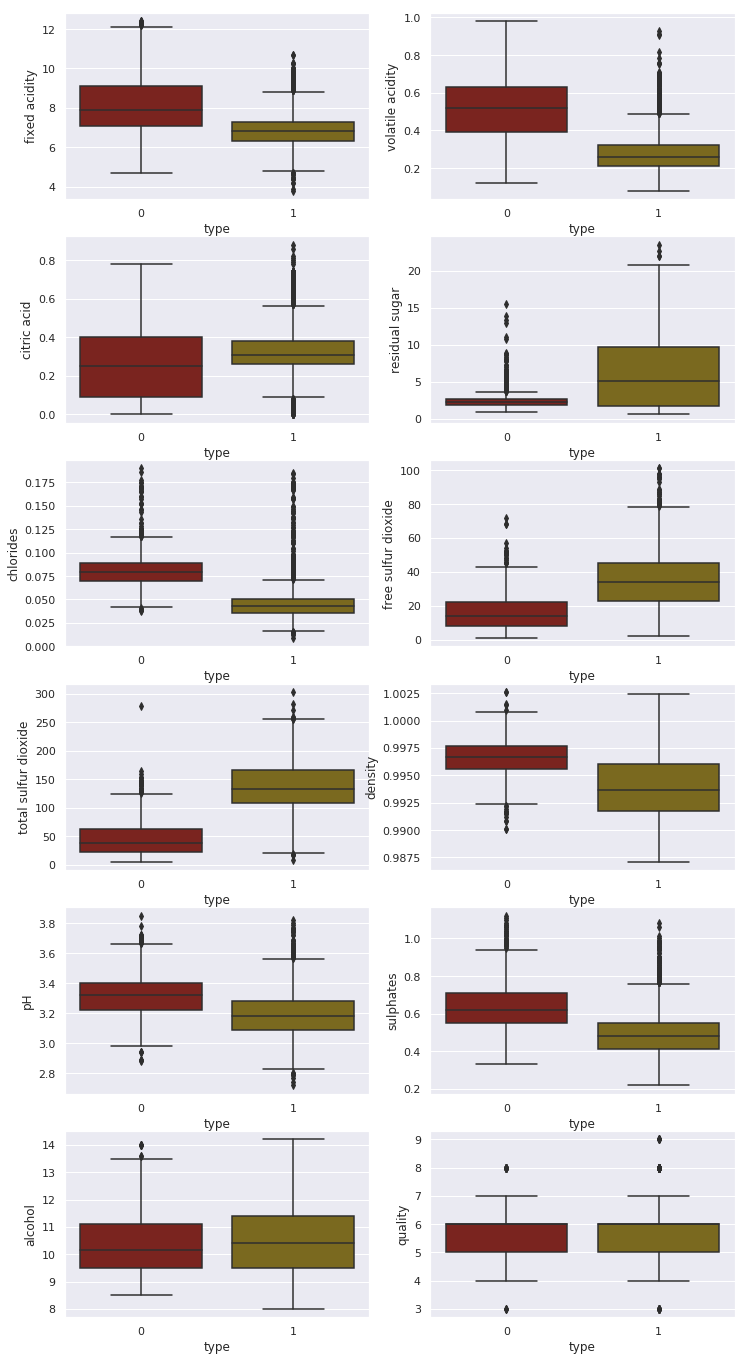

In [21]:
column_names = wine_train_cleaned_data.columns

sns.set(rc={'figure.figsize':(12,24)})
for index, column_name in enumerate(column_names[1:]):
    plt.subplot(6,2,index+1)
    ax = sns.boxplot(
        x='type', y=column_name, data=wine_train_cleaned_data, 
                     palette=sns.hls_palette(8, l=.3, s=.8)
    )
sns.set(rc={'figure.figsize':(12,12)})

Apesar de existirem algumas distinções bem claras entre os tipos de vinhos, como os observados no diagrama de caixas da variável `total sulfur dioxide`, a variável output `quality` apresenta uma distribuição semelhante. Por causa destes comportamentos distintos entre os tipos de vinhos, iremos procurar agrupar análises por `type`.

------------------

Para entender o relacionamento que existe entre as variáveis disponíveis, e aprofundar nosso conhecimento acerca do dataset, podemos calcular uma matriz de correlação das variáveis. 

A matriz de correlação de Pearson, muito popular, é própria para indicar relacionamentos lineares entre variáveis. Dito isto, podemos esperar que algumas variáveis possam possuir comportamentos parabólicos, visto que, como diz o ditado, "tudo em excesso faz mal". Já que estamos falando de qualidade dos vinhos, valores muito pequenos ou grandes de certas propriedades podem afetar negativamente sua qualidade, o que implica a possível existência de máximos locais. Por causa disso, iremos, inicialmente, utilizar a matriz de [correlação de distância](https://en.wikipedia.org/wiki/Distance_correlation) para analisar os relacionamentos, já que ela é mais apropriada para medir associações não-lineares, de acordo com a nossa hipótese.

In [22]:
def distance_correlation_matrix(dataset):
    column_names = dataset.columns.tolist()
    correlation_dataframe = pd.DataFrame(index=column_names, columns=column_names)

    k=0
    for column_name in column_names:

        v1=dataset.loc[:,column_name].as_matrix()
        for j in column_names[k:]:
            v2=dataset.loc[:,j].as_matrix()
            rez=dcor.distance_correlation(v1,v2)
            correlation_dataframe.at[column_name,j]=rez
            correlation_dataframe.at[j,column_name]=rez

        k=k+1

    return correlation_dataframe.convert_objects(convert_numeric=True)

Na matriz de correlação abaixo, iremos tentar procurar correlações que se destacam, utilizando um mapa de calor para auxiliar a visualização. Iremos realizar essa busca em dois momentos, fazendo uma sepação por `type`.

In [23]:
def correlation_heatmap(dataset, method, sub_title, color):
    fig , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    if method == 'distance':
        corr_mat = distance_correlation_matrix(dataset)
    else:
        corr_mat = dataset.corr(method=method)
    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    fig = sns.heatmap(
        corr_mat, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        mask=mask,
        annot_kws={'fontsize':12 }
    )
    
    plt.title(
        '{method} Correlation Matrix - {sub_title}'.format(method=method.capitalize(), sub_title=sub_title), 
        y=1.05, size=15, color=color
    )

Podemos plotar, em seguida, as variáveis destacas, de duas em duas, agrupando por tipo de vinho, e tentar observar padrões que podem ser explorados de maneira mais próxima utilizando o seguinte método de visualização:

In [24]:
def plot_pair_grid(dataset, color):
    dataset_pairplot = sns.PairGrid(dataset)
    dataset_pairplot.map_diag(plt.hist, color=color)
    dataset_pairplot.map_offdiag(plt.scatter, alpha=0.3, s=4, color=color)
    xlabels,ylabels = [],[]

    for ax in dataset_pairplot.axes[-1,:]:
        xlabel = ax.xaxis.get_label_text()
        xlabels.append(xlabel)
    for ax in dataset_pairplot.axes[:,0]:
        ylabel = ax.yaxis.get_label_text()
        ylabels.append(ylabel)

    for i in range(len(xlabels)):
        for j in range(len(ylabels)):
            dataset_pairplot.axes[j,i].xaxis.set_label_text(xlabels[i])
            dataset_pairplot.axes[j,i].yaxis.set_label_text(ylabels[j])

    for i, j in zip(*np.triu_indices_from(dataset_pairplot.axes, 1)):
        dataset_pairplot.axes[i, j].set_visible(False)
    
    plt.show()

def plot_plair_grid_by_column_group(dataset, column_group, color):
    print('Relações das variáveis {column_group}'.format(column_group=', '.join(column_group)))
    plot_pair_grid(dataset.loc[:, column_group], color)

### Primeiramente, iremos analisar os <font color='firebrick'>**vinhos tintos**</font>:

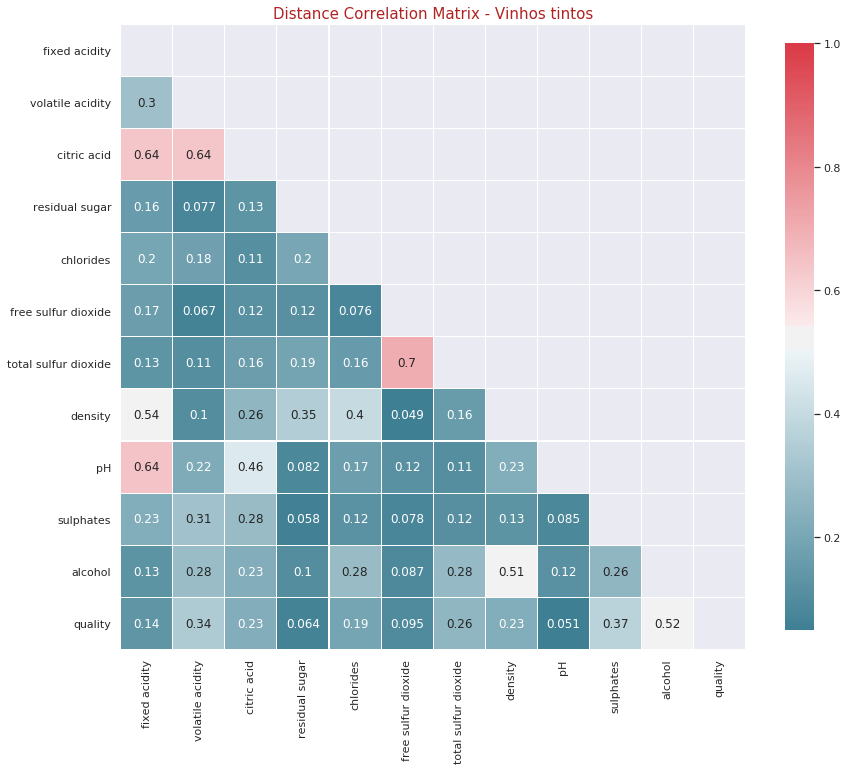

In [25]:
correlation_heatmap(
    wine_train_cleaned_data[wine_train_cleaned_data.type == 0].iloc[:, 1:],
    method='distance',
    sub_title='Vinhos tintos',
    color='firebrick'
)

`alcohol`, `sulphates`, `total sulfur dioxide`, `volatile acidity`

Dentre os <font color='firebrick'>**vinhos tintos**</font>, podemos destacar algumas associações entre os seguintes grupos de variáveis:

---------------

### (1) `fixed acidity` e [`pH`, `density`, `citric acid`]
É intuitivo que a variável que, por nomenclatura, deve descrever acidez, está correlacionada com o `pH` e `citric acid`. A correlação com a densidade, entretanto, é menos trivial, e deve ser consequência da presença de outras substâncias responsáveis pela `fixed acidity`.

### (2) `volatile acidity` e [`citric acid`, `quality`]
A `volatile acidity`, ou [acidez volátil](https://en.wikipedia.org/wiki/Wine_fault#Acetic_acid), é uma característica do vinho, se a nomenclatura das propriedades corresponderem. Essa propriedade [está normalmente associada com características mais aromáticas](https://www.decanter.com/learn/volatile-acidity-va-45532/). Podemos perceber uma forte dependência com a variável `citric acid` e uma das maiores dependências com a variável `quality`, o que é algo intuitivo, visto que o aroma do vinho deve ser responsável também pela qualidade a ele atribuída.

### (3) `citric acid` e `pH`
Outra associação intuitiva, assim como descrito em (1).

### (4) `density` e [`residual sugar`, `alcohol`]
A densidade da frutose é de [1,59 g·cm-3](https://pt.wikipedia.org/wiki/Frutose), maior que a densidade da água, que por sua vez é maior que a densidade do [álcool
](https://pt.wikipedia.org/wiki/Etanol). Podemos esperar que uma maior presença da quantidade dessas substâncias possa ter uma forte influência na densidade do produto final.

### (5) `chlorides` e `density`
Essa variável pode ter alguma relação com o ['cork taint'](https://en.wikipedia.org/wiki/Cork_taint), uma característica dos vinhos normalmente decorrente da presença de particulas da rolha da garrafa. Essa característica normalmente tem uma associação negativa com a qualidade do vinho, algo não tão expressivo nos coeficientes de correlação.

### (6) `total sulfur dioxide` e [`free sulfur dioxide`, `quality`]
O [dióxido de enxofre](https://en.wikipedia.org/wiki/Wine_fault#Sulfur_dioxide) é normalmente adicionado no vinho para auxiliar na conservação do vinho, mas pode afetar o sabor quando adicionado em quantidades excessivas. O dióxido de enxofre livre (FSO²). 

De acordo com o [seguinte artigo](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too), o FSO² é o agente mais responsável pela preservação do vinho enquanto o dióxido de enxofre total (TSO²), que é uma medida da soma do FSO² e do dióxido de enxofre combinado (BSO²), quando em quantidades contrastantes com o FSO², pode significar que existe uma instabilidade química ou microbiótica no vinho. Ainda mais, o artigo apresenta um relacionamento matemático entre o FSO² e o BSO², o que ajuda a explicar a forte dependência entre `total sulfur dioxide` e `free sulfur dioxide`.

Levando esses conhecimentos em consideração, podemos perceber que, de fato, a variável `total sulfur dioxide` apresenta uma maior dependência com a variável `quality` do que a variável `free sulfur dioxide`.

### (7) `sulphates` e `quality`
Os sulfatos são sais de ácido sulfúrico, e são conversantes, evitando crescimento microbial nos vinhos. Estes componentes normalmente ocorrem [naturalmente no processo de fermentação do vinho](https://www.winespectator.com/drvinny/show/id/Difference-Between-Sulfites-Sulfates-Wine-54706). É de se esperar, que existe um relacionamento com a variável `alcohol`, já que ambos são componentes químicos gerados durante a fermentação, algo que é levemente notado na matriz. Normalmente os sulfatos são complementados com dióxido de enxofre. 

### (8) `alcohol` e `quality`
Existe uma dependência bem interessante entre essas duas variáveis, notavelmente o maior coeficiente entre a variável `quality`e qualquer outra nesta matriz de correlação.

-------------

Podemos agora plotar as variáveis em pares e observar os comportamentos de relacionamento entre elas. Para facilitar nossa visualização de pares, faremos uma separação por grupos de variáveis de interesse já mapeados através de matriz de correlações:

In [36]:
red_wine_column_groups = [
    ['fixed acidity', 'pH', 'density', 'citric acid', 'volatile acidity', 'quality'],
    ['density', 'residual sugar', 'alcohol', 'quality'],
    ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'density', 'quality']
]

red_wine_train_cleaned_data = wine_train_cleaned_data[wine_train_cleaned_data.type == 0]

#### Variáveis que descrevem acidez:

Podemos notar relações mais imediatas e aproximadamente lineares entre os grupos destacados acima. A variável `pH` diminui com aumentos `fixed acidity` e `citric acid`, o que é quimicamente esperado visto que substâncias mais ácidas têm pH's mais baixos. Entretanto, como notamos na matriz de correlação, a mesma relação não é aparentemente notável para a variável `volatile acidity`.

Aparentemente, a variável `citric acid` e `volatile acidity` apresentação uma correlação linear negativa.

Relações das variáveis fixed acidity, pH, density, citric acid, volatile acidity, quality


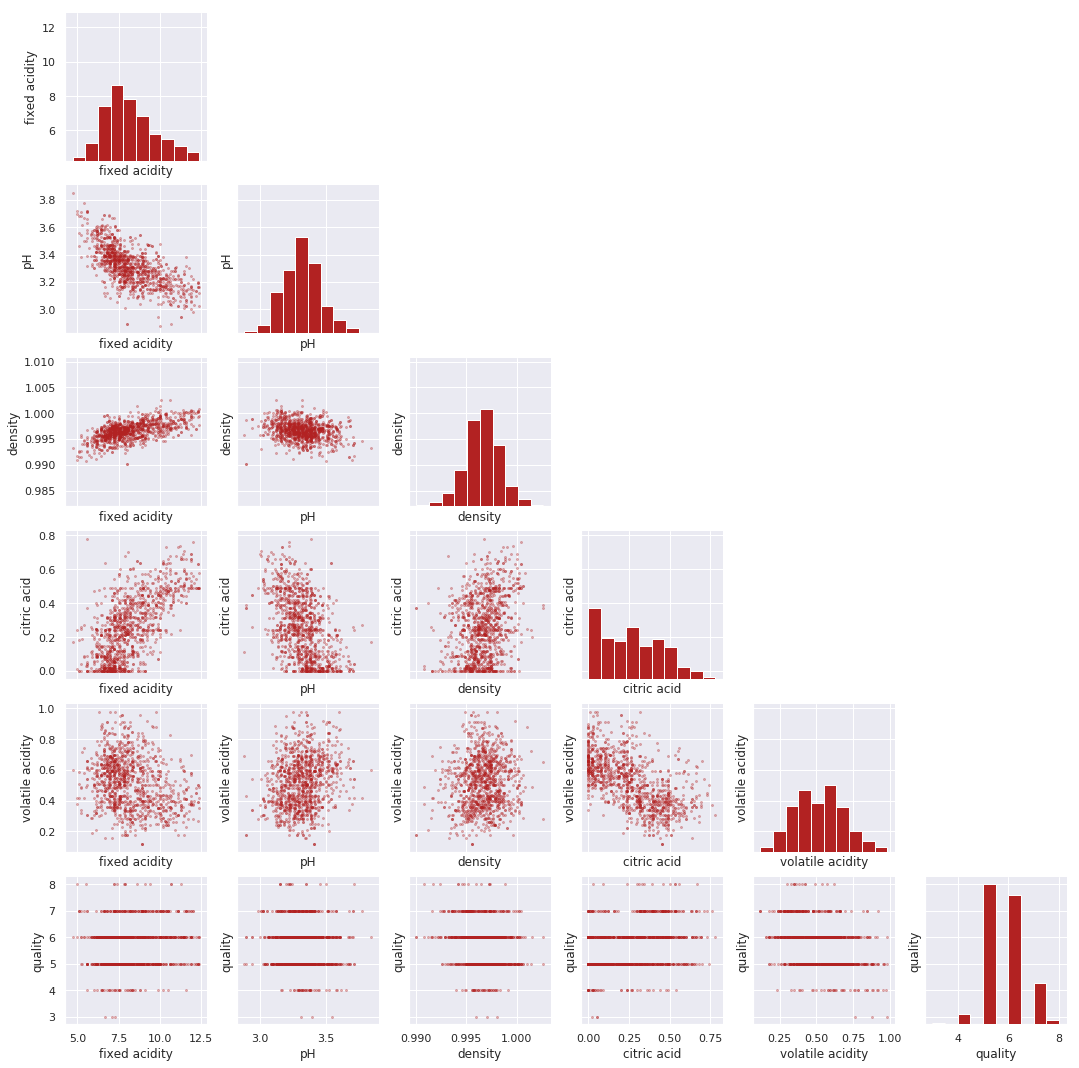

In [27]:
plot_plair_grid_by_column_group(red_wine_train_cleaned_data, red_wine_column_groups[0], 'firebrick')

#### Variáveis que descrevem relacionamento entre açúcares, álcool e densidade:

Podemos notar que a relação destacada entre `residual sugar` e `density` é menor do que as expectativas, provavelmente por causa de alguns pontos de alta densidade e açúcar residual.

De maneira esperada, o valor de `density` cai com o aumento da variável `alcohol`, e podemos notar que vinhos de maior teor alcoólico parecem ter uma maior qualidade.

Relações das variáveis density, residual sugar, alcohol, quality


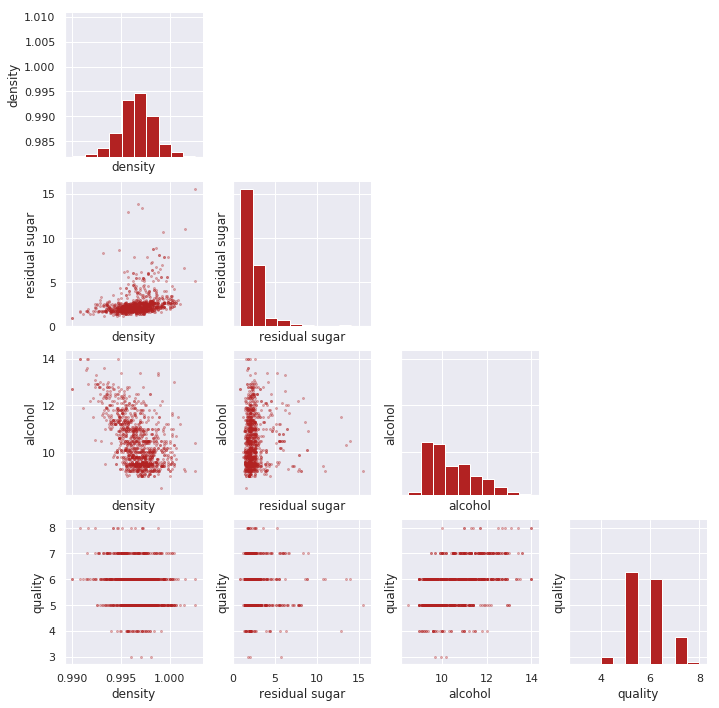

In [28]:
plot_plair_grid_by_column_group(red_wine_train_cleaned_data, red_wine_column_groups[1], 'firebrick')

#### Variáveis que descrevem relacionamento entre outras substâncias químicas:

Podemos observar o comportamento esperado entre `free sulfur dioxide` e `total sulfur dioxide`, e uma aparente heteroscedasticidade entre as duas variáveis, algo que provavelmente é decorrente da dependência de outra variável não presente no dataset, o BSO².

Relações das variáveis chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, density, quality


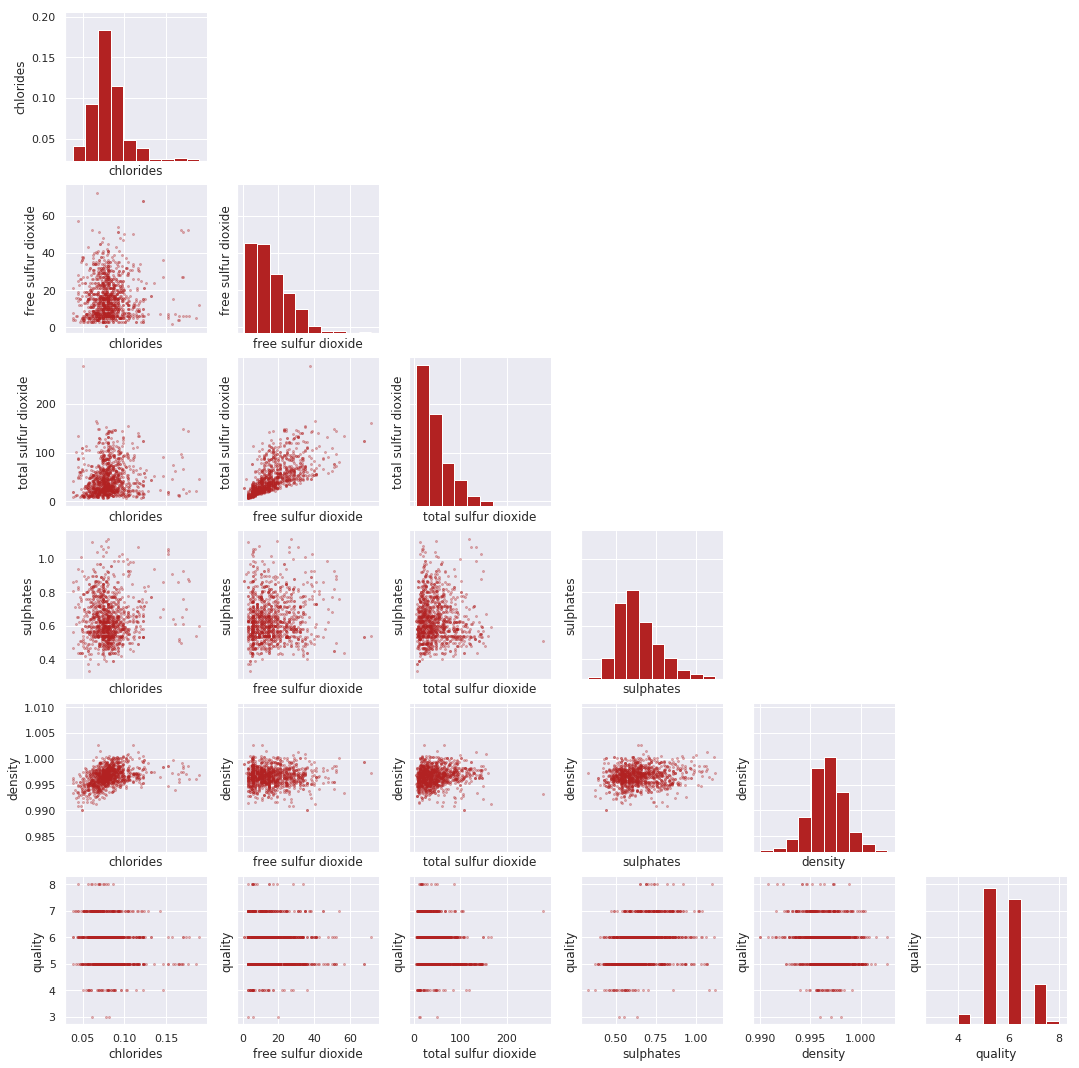

In [29]:
plot_plair_grid_by_column_group(red_wine_train_cleaned_data, red_wine_column_groups[2], 'firebrick')

Podemos observar que os relacionamentos entre as variáveis são, aparentemente dispersos, o que pode diminuir os problemas de multicolinearidade que vamos observar aplicando métodos de regressão lineares, mas não os eliminam. Dito isto, e observando comportamentos lineares, podemos nos utilizar de uma regressão multilinear para entender melhor a relevância das variáveis para a regressão da variável `quality`:

In [45]:
formula = 'quality ~ {independent_variables}'.format(
    independent_variables='+'.join(
        map(lambda column_name: 'Q("' + column_name + '")', column_names[1:-1])
    )
)

smf_ols =  smf.ols(
    data=red_wine_train_cleaned_data, 
    formula=formula
).fit()

smf_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     67.26
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          1.85e-116
Time:                        03:18:37   Log-Likelihood:                -1123.1
No. Observations:                1188   AIC:                             2270.
Df Residuals:                    1176   BIC:                             2331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     7.2588     25.559      0.284      0.776     -42.888      57.405
Q("fixed acidity")            0.0212      0.031      0.677      0.498      -0.040       0.083
Q("volatile acidity")        -0.9312      0.157     -5.941      0.000      -1.239      -0.624
Q("citric acid")             -0.2801      0.176     -1.595      0.111      -0.625       0.064
Q("residual sugar")           0.0106      0.018      0.588      0.557      -0.025       0.046
Q("chlorides")               -1.6058      1.017     -1.578      0.115      -3.602       0.390
Q("free sulfur dioxide")      0.0025      0.002      1.016      0.310      -0.002       0.007
Q("total sulfur dioxide")    -0.0026      0.001     -3.090      0.002      -0.004      -0.001
Q("density")                 -3.7648     26.107     -0.144      0.885     -54.986      47.456
Q("pH")                      -0.4204      0.227     -1.851      0.064      -0.866       0.025
Q("sulphates")                1.3441      0.161      8.329      0.000       1.027       1.661
Q("alcohol")                  0.3108      0.031      9.988      0.000       0.250       0.372
==============================================================================
Omnibus:                       11.721   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.336
Skew:                          -0.048   Prob(JB):                     0.000172
Kurtosis:                       3.584   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Através dos valores de p-value, podemos observar que as variáveis `alcohol`, `sulphates`, `total sulfur dioxide`, `volatile acidity` são mais significativas em uma regressão multilinear simples. Além dessas, é notável que a partir da matriz de correlação, esperavamos também uma melhor significância da variável `density`, o que pode significar que essa variável pode ser, na verdade, dependente de outras variáveis. Essa assunção parece intuitiva visto que temos no dataset várias outras variáveis que descrevem a composição química do vinho, e como vimos anteriormente, algumas dessas variáveis tem forte correlação com a densidade do produto. 

Vale ressaltar que a partir da regressão multilinear podemos fazer aproximações de modelos mais robustos utilizando variáveis compostas e potenciais de variáveis, além de usar métodos de seleção de variáveis como a tradicional [eliminação bidirecional](https://en.wikipedia.org/wiki/Stepwise_regression) ou [lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)) para a regularização das variáveis. No entanto, iremos nos ater neste momento a esta profundidade de modelagem, e faremos um melhor trabalho de seleção de features durante a etapa de modelagem.

----------------------

### Segundamente, iremos analisar os <font color='goldenrod'>**vinhos brancos**</font>:

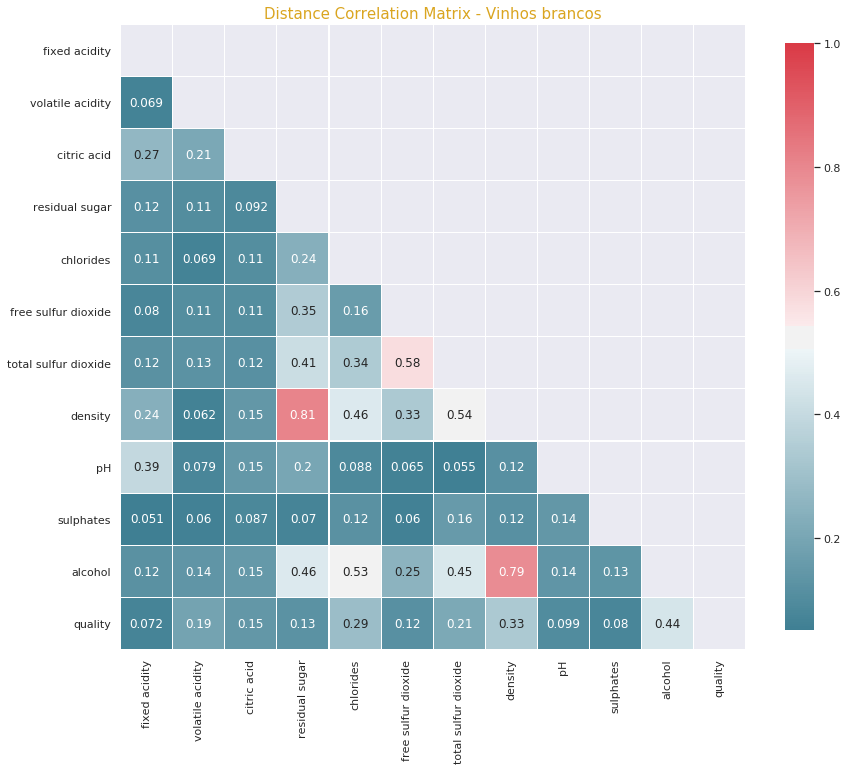

In [32]:
correlation_heatmap(
    wine_train_cleaned_data[wine_train_cleaned_data.type == 1].iloc[:, 1:],
    method='distance',
    sub_title='Vinhos brancos',
    color='goldenrod'
)

Percebemos uma diferença perceptível entre as associações em destaque dos vinhos brancos em relação aos tintos. Dentre os <font color='goldenrod'>**vinhos brancos**</font>, podemos destacar algumas associações entre os seguintes grupos de variáveis:

---------------

### (1) `fixed acidity` e `pH`
Diferente do vinho tinto, essa variável apresentou coeficientes de dependência menores, mas ainda podemos notar a associação mais sútil com as mesmas variáveis, desta vez mais acentuadas com o `pH`.

### (2) `density` e [`residual sugar`, `alcohol`]
O coeficiente para os vinhos brancos tem magnitude ainda maior, reforçando ainda mais o relacionamento entre estas variáveis.

### (3) `chlorides` e [`density`, `alcohol`]
Comportamento semelhante ao encontrado dentre os vinhos tintos, com a diferença de que podemos observar um maior relacionamento com a variável `alcohol`.

### (4) `total sulfur dioxide` e [`free sulfur dioxide`, `alcohol`, `density`]
Ainda podemos observar o relacionamento entre `total sulfur dioxide` e `free sulfur dioxide`, a principal diferença está no maior relacionamento com as variáveis `alcohol` e `density`.

### (5) `alcohol` e `quality`
Existe uma dependência bem interessante entre essas duas variáveis, notavelmente o maior coeficiente entre a variável `quality`e qualquer outra nesta matriz de correlação.

-------------

Podemos agora plotar as variáveis em pares e observar os comportamentos de relacionamento entre elas. Para facilitar nossa visualização de pares, faremos uma separação por grupos de variáveis de interesse já mapeados através de matriz de correlações:

In [46]:
white_wine_column_groups = [
    ['fixed acidity', 'pH', 'quality'],
    ['density', 'residual sugar', 'alcohol', 'quality'],
    ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'density', 'quality']
]

white_wine_train_cleaned_data = wine_train_cleaned_data[wine_train_cleaned_data.type == 1]

#### Variáveis que descrevem acidez:

Podemos notar um relacionamento claro entre `fixed acidity` e o `pH`, assim como nos vinhos tintos.

Relações das variáveis fixed acidity, pH, quality


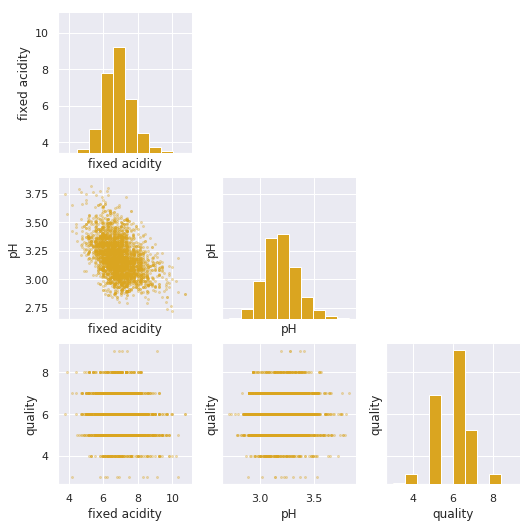

In [47]:
plot_plair_grid_by_column_group(white_wine_train_cleaned_data, white_wine_column_groups[0], 'goldenrod')

#### Variáveis que descrevem relacionamento entre açúcares, álcool e densidade:

Nos vinhos brancos podemos notar uma correlação entre a variável `residual sugar` e `density`, desta vez não aparentando ser acidental.

Podemos ver o comportamento presente entre a variável `alcohol` e as variáveis `density` e `quality` mais uma vez. 

Relações das variáveis density, residual sugar, alcohol, quality


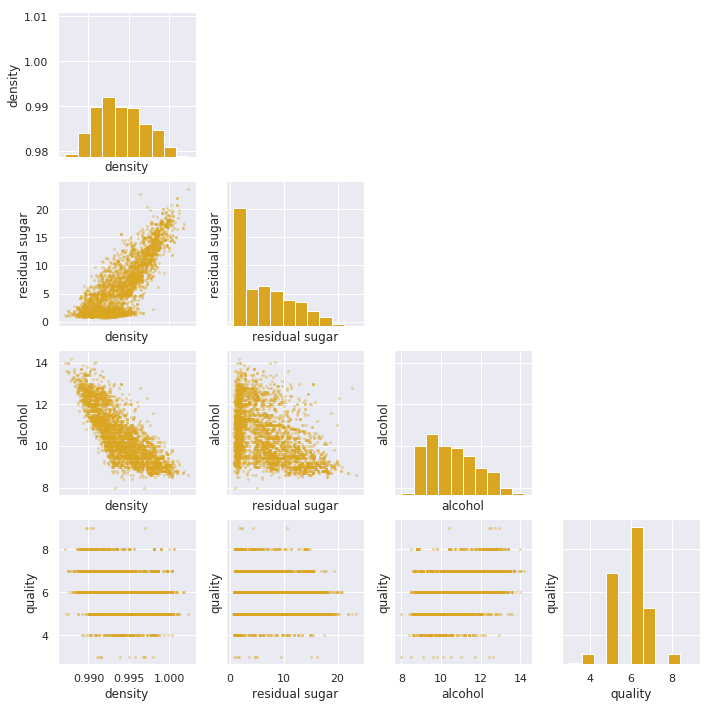

In [48]:
plot_plair_grid_by_column_group(white_wine_train_cleaned_data, white_wine_column_groups[1], 'goldenrod')

#### Variáveis que descrevem relacionamento entre outras substâncias químicas:

Podemos observar o comportamento esperado entre `free sulfur dioxide` e `total sulfur dioxide` mais uma vez. 

Também podemos notar que o comportamento inicialmente percebido entre as variável `alcohol` e `chlorides` parece ser acidental.

Relações das variáveis chlorides, free sulfur dioxide, total sulfur dioxide, alcohol, density, quality


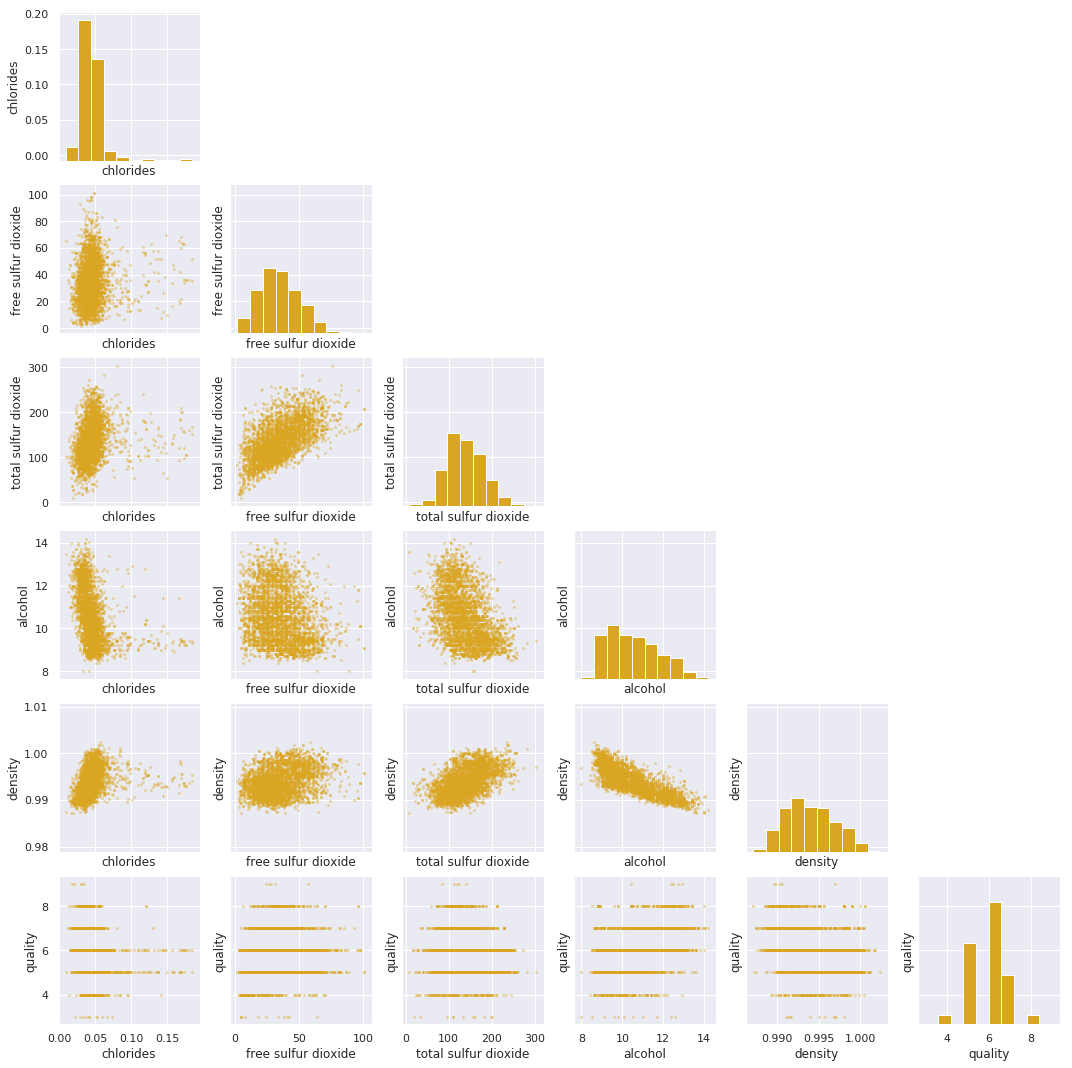

In [49]:
plot_plair_grid_by_column_group(white_wine_train_cleaned_data, white_wine_column_groups[2], 'goldenrod')

Podemos observar que os relacionamentos entre as variáveis são, aparentemente dispersos, o que pode diminuir os problemas de multicolinearidade que vamos observar aplicando métodos de regressão lineares, mas não os eliminam. Dito isto, e observando comportamentos lineares, podemos nos utilizar de uma regressão multilinear para entender melhor a relevância das variáveis para a regressão da variável `quality`:

In [50]:
formula = 'quality ~ {independent_variables}'.format(
    independent_variables='+'.join(
        map(lambda column_name: 'Q("' + column_name + '")', column_names[1:-1])
    )
)

smf_ols =  smf.ols(
    data=white_wine_train_cleaned_data, 
    formula=formula
).fit()

smf_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          1.50e-282
Time:                        03:43:50   Log-Likelihood:                -4308.8
No. Observations:                3858   AIC:                             8642.
Df Residuals:                    3846   BIC:                             8717.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   242.0782     26.945      8.984      0.000     189.250     294.907
Q("fixed acidity")            0.1589      0.026      5.997      0.000       0.107       0.211
Q("volatile acidity")        -1.7123      0.128    -13.394      0.000      -1.963      -1.462
Q("citric acid")              0.0373      0.113      0.330      0.742      -0.185       0.259
Q("residual sugar")           0.1098      0.010     10.890      0.000       0.090       0.130
Q("chlorides")               -0.3254      0.800     -0.407      0.684      -1.895       1.244
Q("free sulfur dioxide")      0.0056      0.001      5.626      0.000       0.004       0.008
Q("total sulfur dioxide")  -3.14e-05      0.000     -0.073      0.942      -0.001       0.001
Q("density")               -243.4506     27.305     -8.916      0.000    -296.984    -189.917
Q("pH")                       0.9285      0.128      7.269      0.000       0.678       1.179
Q("sulphates")                0.7936      0.112      7.083      0.000       0.574       1.013
Q("alcohol")                  0.0897      0.034      2.653      0.008       0.023       0.156
==============================================================================
Omnibus:                       81.644   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.319
Skew:                           0.177   Prob(JB):                     5.59e-31
Kurtosis:                       3.861   Cond. No.                     4.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Através dos valores de p-value, podemos observar que as variáveis `sulphates`, `pH`, `density`, `free sulfur dioxide`, `residual sugar`, `volatile acidity` e `fixed acidity` foram todas variáveis significantes nesta regressão multilinear simples. Esperavamos um maior poder descritivo da variável `alcohol`, mas provavelmente temos conflitos de multicolinearidade dentre essas variáveis.

Podemos notar que, diferente do modelo multilinear dos vinhos tintos, o nosso `Intercept`, que representa o viés do modelo, é muito mais significativo, também podemos perceber que a soma do coeficiente de `density` e o `Intercept` quase se anulam. Além disso, sabemos que `density` assume valores próximos de 1. O conjunto desses fatores nos informa mais uma vez que a `density` parece ser uma variável removível nas nossas modelagens.

Mais uma vez, apesar do espaço para melhorias, iremos nos ater neste momento a esta profundidade de modelagem, e faremos um melhor trabalho de seleção de features durante a etapa de modelagem.

--------------------------------

### Compreendendo a multicolinearidade existente utilizando Análise de Principais Componentes

Os comportamentos de relacionamento entre variáveis observados, junto com os resultados obtidos das modelagens lineares podem nos levar à conclusão imediata de que temos diversas instâncias de multicolinearidade. De fato, algumas variáveis estão atadas em comportamentos lineares, como as variáveis `density` e `residual sugar` e `alcohol`, nos vinhos brancos, por exemplo, mas a dispersão apresentada nos gráficos de linha nos mostram que existe variância entre os valores.

Através de uma [análise de principais componentes](https://en.wikipedia.org/wiki/Principal_component_analysis) podemos ter uma melhor compreensão da quantidade de variáveis independentes que precisamos por modelo para reduzir nosso problema de multicolinearidade, apenas com uma pequena redução de variância.

In [65]:
red_wine_pca = PCA(n_components=0.999).fit_transform(red_wine_train_cleaned_data[1:-1])
white_wine_pca = PCA(n_components=0.999).fit_transform(white_wine_train_cleaned_data[1:-1])

print('Quantidade de componentes principais mantendo 0.999 da variância entre as variáveis')
print('Vinhos tintos:', len(red_wine_pca[0]))
print('Vinhos brancos:', len(white_wine_pca[0]))

Quantidade de componentes principais mantendo 0.999 da variância entre as variáveis
Vinhos tintos: 5
Vinhos brancos: 4


É importante observar que dificilmente vamos conseguir inferir causalidade entre as variáveis de input, e portanto é uma decisão delicada decidir quais delas devem permanecer sem análise mais cuidadosa. Métodos como a análise de principais componentes nos ajudam neste aspecto, mas retiram a visão das variáveis mais relevantes.